## Exercise 2
### Energy Efficient Distributed Systems
#### SS 21
Kawczynski Christopher, Mazi Emeka, Bacca Lorenz

In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA


ModuleNotFoundError: No module named 'statsmodels'

In [54]:
data = pd.read_csv('datasets/traffic/traffic.csv')
data = data[(data.Junction == 1) & (data.DateTime >= '2017-01-01 00:00:00') & (data.DateTime < '2017-01-10 00:00:00')]
data = data.drop(['Junction', 'ID'], axis = 1)
data.rename(columns = {'DateTime': 'ds', 'Vehicles': 'y'}, inplace = True)

In [55]:
train, test = train_test_split(data, test_size=0.3,  shuffle = False)

In [67]:
test.head()

,ds,y
10768,2017-01-22 16:00:00,48
10769,2017-01-22 17:00:00,47
10770,2017-01-22 18:00:00,51
10771,2017-01-22 19:00:00,57
10772,2017-01-22 20:00:00,60


In [72]:
m = Prophet()
m.fit(data)

future = m.make_future_dataframe(periods=2*24, freq='H')
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


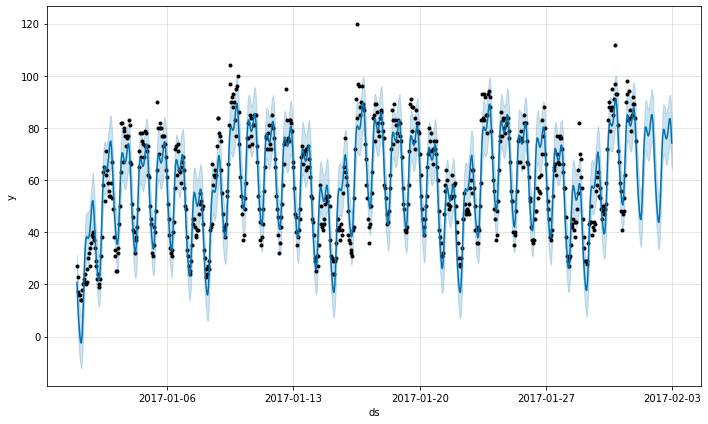

In [73]:
fig1 = m.plot(forecast)


In [77]:
prediction = forecast[(forecast.ds >= '2017-01-22 16:00:00') & (forecast.ds < '2017-02-01 00:00:00')][["ds", "yhat"]]

In [79]:
prediction.head()

,ds,yhat
520,2017-01-22 16:00:00,56.143417
521,2017-01-22 17:00:00,57.930028
522,2017-01-22 18:00:00,61.064699
523,2017-01-22 19:00:00,64.947567
524,2017-01-22 20:00:00,68.286132


In [88]:
test.head()

,ds,y
10768,2017-01-22 16:00:00,48
10769,2017-01-22 17:00:00,47
10770,2017-01-22 18:00:00,51
10771,2017-01-22 19:00:00,57
10772,2017-01-22 20:00:00,60


In [87]:
test['ds'] = pd.to_datetime(test['ds'])


<ipython-input-87-ba1d468fb1ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ds'] = pd.to_datetime(test['ds'])


In [89]:
eval = pd.merge(prediction, test, how = "inner")

In [96]:
mae_prophet = mean_absolute_error(eval[['y']], eval[['yhat']])
mse_prophet = mean_squared_error(eval[['y']], eval[['yhat']])
mape_prophet = mean_absolute_percentage_error(eval[['y']], eval[['yhat']])
r2_prophet = r2_score(eval[['y']], eval[['yhat']])